We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

1.State your Null Hypothesis and Alternative Hypothesis
2.Select the correct test according to the data type and number of samples
3.Test the assumptions of your selected test.
4.Execute the selected test, or the alternative test (if you do not meet the assumptions)
5.Interpret your p-value and reject or fail to reject your null hypothesis 
6.Show a supporting visualization that helps display the result

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Q1. Do smokers have higher insurance charges than non-smokers?

Hypothesis:

+ Null Hypothesis: Smokers and non-smokers have same insurance charges.
+ Alternate Hypothesis: There is a significant difference between the insurance charges of smokers and non smokers.
+ Significance Level (Alpha): For this test, our alpha value is 0.05
+ Test Used : Tee-Test

### Explore the data

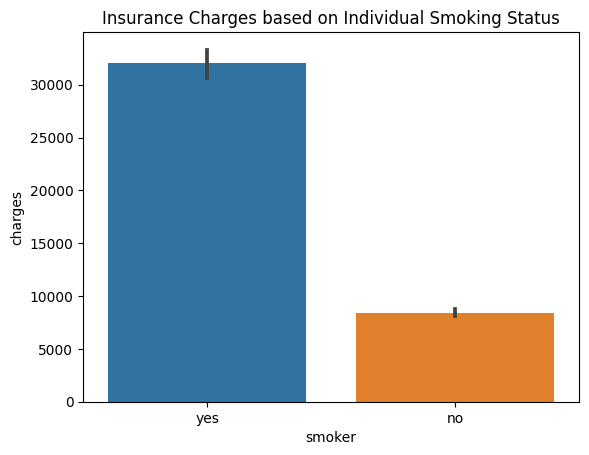

In [27]:
# let's visualize smokers status and their level of insurance 
ax = sns.barplot(data=df, x='smoker', y='charges')
ax.set_title('Insurance Charges based on Individual Smoking Status');

In [7]:
# see how many in each group
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [20]:
# Filtering out those who are smokers and non smokers
smoker_df = df.loc[df['smoker']== 'yes'].copy()
non_smoker_df = df.loc[df['smoker']== 'no'].copy()

In [22]:
# Define our feature of interest
smoker_charge = smoker_df['charges']
non_smoker_charge = non_smoker_df['charges']

### Check for Significant outliers

In [23]:
# Check for outliers in charges for smokers group
zscores= stats.zscore(smoker_charge)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [24]:
# Check for outliers in charges for nonsmokers group
zscores= stats.zscore(non_smoker_charge)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [38]:
# remove outliers for nonsmokers group
non_smoker_charge = non_smoker_charge[(np.abs(stats.zscore(non_smoker_charge)) < 3)]

### Normality Test

In [28]:
# test the smoker group for normality
result_smoker_charge = stats.normaltest(smoker_charge)
result_smoker_charge

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [29]:
result_smoker_charge.pvalue > 0.05

False

In [30]:
# test the non smoker group for normality
result_non_smoker_charge = stats.normaltest(non_smoker_charge)
result_non_smoker_charge

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [31]:
result_non_smoker_charge.pvalue > 0.05

False

Our p-values for both group are well below 0.05 which means our data is NOT normally distributed. However, our our sample size is large enough to proceed without satisfying this test. For an independent t test, sample sizes of 15 per group are considered sufficient.

### Check for Equal Variance

In [41]:
# Test for equal variance
result = stats.levene(smoker_charge, non_smoker_charge)
result

LeveneResult(statistic=672.9614970899742, pvalue=8.519436906838144e-120)

In [42]:
result.pvalue < 0.05

True

We don't have equal variances. Since pvalue is less than alpha we reject the Null hypothesis which states that the variance for both groups are equal and make equal_var = False when performing t-test

In [43]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_charge, non_smoker_charge, equal_var = False)
result

Ttest_indResult(statistic=34.32521687276006, pvalue=3.183690185070226e-105)

In [44]:
result.pvalue < 0.05

True

Our p value < alpha (0.05), so we reject the null hypothesis and accept that there is a significant difference between the insurance charges of smokers and non-smokers.

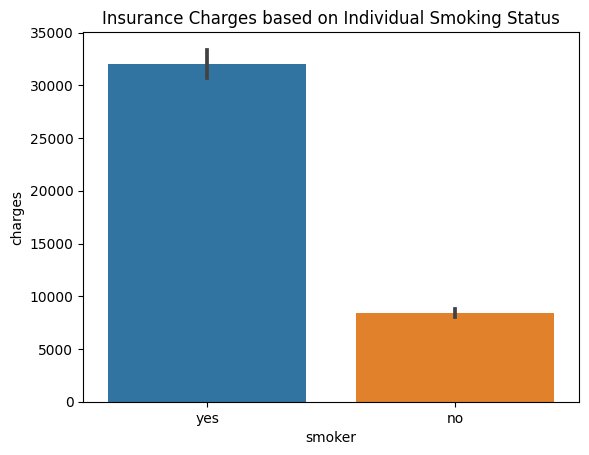

In [4]:
# let's visualize smokers status and their level of insurance 
ax = sns.barplot(data=df, x='smoker', y='charges')
ax.set_title('Insurance Charges based on Individual Smoking Status');

Visuals reveals smokers have an higher insurance charges than non-smokers

### Q2. Are men more likely to smoke than women?

Hypothesis:

+ Null Hypothesis: There is no relationship between Sex(Male or Female) and whether they smoke or not
+ Alternate Hypothesis: An Individual's Sex influenced if they Smoke or not
+ Significance Level (Alpha): For this test, our alpha value is 0.05
+ Test Used : Chi-Test

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


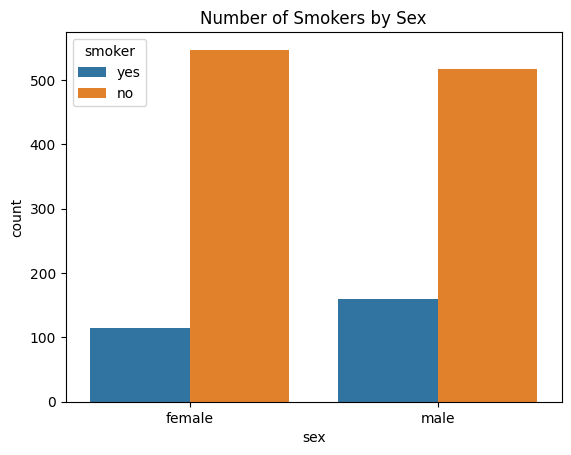

In [47]:
# First, let's visualize smoking status by sex
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [48]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [49]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [51]:
# What was our p-value?
print(p)
p<0.05

0.006548143503580697


True

The p-value is less than 0.05, so we have a significant result.

Since our p < .05, we reject the null hypothesis that there is no relationship between a individual's Sex and if they smoked. This means that we accept the alternate hypothesis and conclude that there is a relationship between an individual's sex and if they smoked or not.

Our visual reveals that men are more likely to smoke

### Q3. Do different regions have different charges, on average?

Hypothesis:

+ Null Hypothesis: Different regions all have same charges
+ Alternate Hypothesis: Different regions have different charges
+ Significance Level (Alpha): For this test, our alpha value is 0.05
+ Test Used : ANOVA

In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
# different regions available
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [54]:
# Create groups dictionary. There are only 4 groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data

In [55]:
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

### Testing Assumptions

In [56]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}

In [57]:
## convert to a dataframe(Transpose form- row to col)
norm_results_df = pd.DataFrame(norm_results).T  
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [58]:
### checking normality with pandas 
norm_results_df['normal'] = norm_results_df['p'] > .05 
norm_results_df

,n,p,test stat,normal
southwest,325.0,6.125298e-23,102.294059,False
southeast,364.0,4.953297e-15,65.877446,False
northwest,325.0,5.184209e-24,107.232850,False
northeast,324.0,1.455431e-19,86.747629,False


The distribution for each region is not normal but since size(n) for each distribution is greater than 15 we can safely move to the next stage

In [60]:
### Testing Assumption of Equal Variance

# with the * operator 
result = stats.levene(*groups.values())
result

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [61]:
result.pvalue < 0.05

True

We don't have equal variances. Since pvalue is less than alpha(0.05) we reject the Null hypothesis which states that the variance for both groups are equal and make equal_var = False when performing ANOVA

In [68]:
#since we fail the variance test we will select a non-parametric equivalent of our test
# note again the use of the * operator for convenience
result = stats.kruskal(*groups.values())
print(result.pvalue)
result.pvalue < 0.05

0.19232908072121002


False

Since pvalue is greater than 0.05. It means we dont have a significant result and we can accept the Null hypothesis(Different region all have same charge)

**Tukey's Pairwise Multiple Comparisons Test**

In [66]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [67]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


The summary shows there is no significant difference in charges between all regions except for southeast and southwest. All regions apart from southeast and southwest have their Null hypothesis accepted

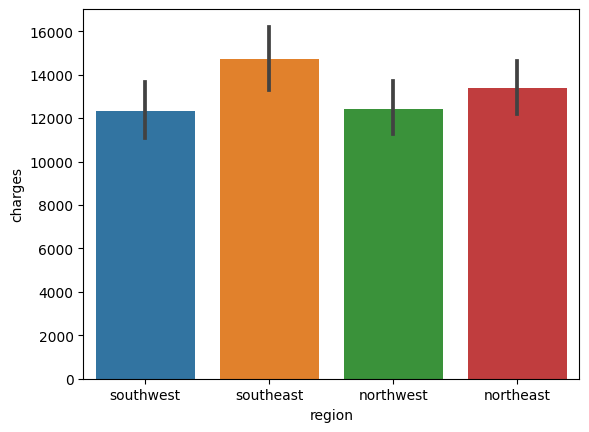

In [69]:
## Supporting Visual

sns.barplot(data= df, x= 'region', y= 'charges');

Visual reveals all regions have very similar charges